In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
X=df.drop(columns=["Survived"])
y=df["Survived"]

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train["Age_imputed"]=X_train["Age"]
X_test["Age_imputed"]=X_test["Age"]

In [12]:
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,NaN
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


In [19]:
X_train["Age_imputed"][X_train["Age_imputed"].isnull()]=X_train["Age"].dropna().sample(X_train["Age"].isnull().sum()).values

C:\Users\lucius seneca\AppData\Local\Temp\ipykernel_18728\3686352960.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train["Age_imputed"][X_train["Age_imputed"].isnull()]=X_train["Age"].dropna().sample(X_train["Age"].isnull().sum()).va

In [21]:
X_test["Age_imputed"][X_test["Age_imputed"].isnull()]=X_train["Age"].dropna().sample(X_test["Age"].isnull().sum()).values

In [22]:
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,39.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


In [23]:
X_test

,Age,Fare,Age_imputed
709,NaN,15.2458,60.0
439,31.0,10.5000,31.0
840,20.0,7.9250,20.0
720,6.0,33.0000,6.0
39,14.0,11.2417,14.0
...,...,...,...
433,17.0,7.1250,17.0
773,NaN,7.2250,27.0
25,38.0,31.3875,38.0
84,17.0,10.5000,17.0


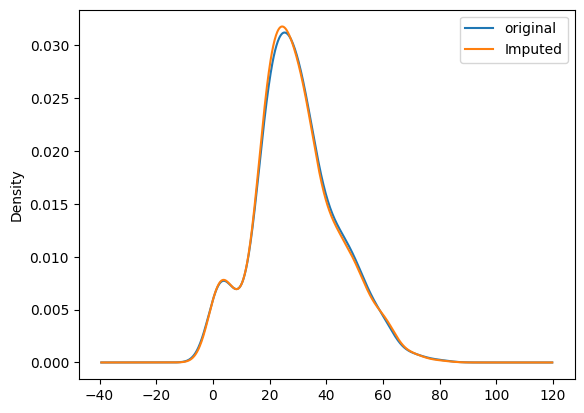

In [27]:
X_train["Age"].plot(kind="kde",label="original")
X_train["Age_imputed"].plot(kind="kde",label="Imputed")
plt.legend()

In [29]:
X_train.describe()

,Age,Fare,Age_imputed
count,572.000000,712.000000,712.000000
mean,29.498846,32.586276,29.318244
std,14.500059,51.969529,14.477358
min,0.420000,0.000000,0.420000
25%,21.000000,7.925000,20.000000
50%,28.000000,14.454200,28.000000
75%,38.000000,30.500000,38.000000
max,80.000000,512.329200,80.000000


In [30]:
X_train.cov()

,Age,Fare,Age_imputed
Age,210.251707,71.580633,210.251707
Fare,71.580633,2700.831981,60.287875
Age_imputed,210.251707,60.287875,209.593906
